In [1]:
library(survival)
library(survminer)
library(ggplot2)

Warning message:
"package 'survival' was built under R version 3.6.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Loading required package: ggpubr

Warning message:
"package 'ggpubr' was built under R version 3.6.3"
Loading required package: magrittr



In [2]:
load("data/Figure6B.rdata")

## calculate nklike and immune evasion

In [3]:
clinic$nklike=(clinic$NK*2+clinic$CD160)/3
clinic$immune_evasion=rep("High",nrow(clinic))
clinic$immune_evasion[(clinic$hlaloh=="No" & clinic$antigen.defect ==0) |clinic$nklike <= median(clinic$nklike)]="Low"

In [4]:
#immune_evasion and clonal_neoantigens
clinic$immune_evasion_clonal_neo=rep(-1,nrow(clinic))
clinic$immune_evasion_clonal_neo[clinic$clonal.neoantigen > median(clinic$clonal.neoantigen) &
                                 clinic$immune_evasion =="Low"]=0
clinic$immune_evasion_clonal_neo[clinic$clonal.neoantigen <= median(clinic$clonal.neoantigen) & 
                                 clinic$immune_evasion =="High"]=1

In [5]:
clinic1=clinic
clinic1$immune_evasion=factor(clinic1$immune_evasion,levels=c("Low","High"))
cox_result=summary(coxph(Surv(clinic1$followe.up..years.,clinic1$is_dead)~immune_evasion,clinic1))
cox_result
print(cox_result$sctest)

Call:
coxph(formula = Surv(clinic1$followe.up..years., clinic1$is_dead) ~ 
    immune_evasion, data = clinic1)

  n= 103, number of events= 52 

                     coef exp(coef) se(coef)     z Pr(>|z|)  
immune_evasionHigh 0.6223    1.8633   0.2777 2.241    0.025 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                   exp(coef) exp(-coef) lower .95 upper .95
immune_evasionHigh     1.863     0.5367     1.081     3.211

Concordance= 0.579  (se = 0.035 )
Likelihood ratio test= 4.98  on 1 df,   p=0.03
Wald test            = 5.02  on 1 df,   p=0.03
Score (logrank) test = 5.18  on 1 df,   p=0.02


      test         df     pvalue 
5.18410343 1.00000000 0.02279443 


Warning message:
"Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2."


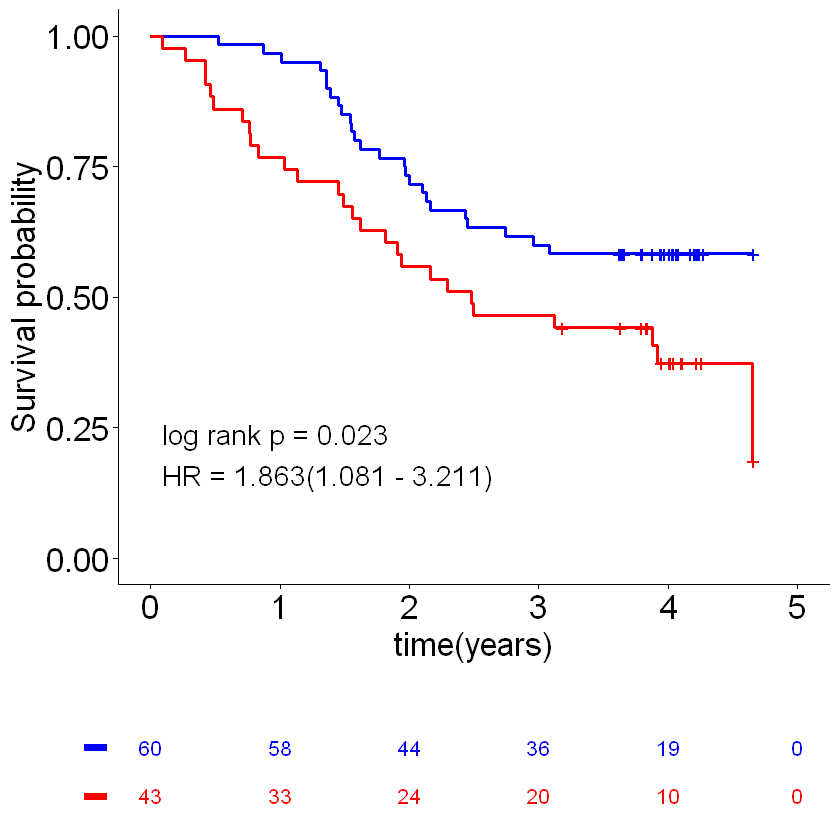

In [6]:
p1=ggsurvplot(survfit(Surv(clinic1$followe.up..years.,clinic1$is_dead)~immune_evasion,clinic1),
             pval="log rank p = 0.023\nHR = 1.863(1.081 - 3.211)", legend="none",
             xlab="time(years)",palette = c("blue","red"),pval.size = 6,
             font.x=c(20),font.y=c(20),font.xtickslab = c(20),font.ytickslab = c(20),font.legend=c(18), 
             risk.table = TRUE, risk.table.height=0.2,
             risk.table.title="",risk.table.col = "strata",risk.table.y.text=FALSE,
             tables.theme=theme(axis.title.x=element_blank(),
                               axis.text.x=element_blank(),
                               axis.title.y=element_blank(),
                               axis.line = element_blank(),
                               axis.ticks=element_blank(), legend.position = "none"))
p1

In [7]:
#  immune evasion and  effective neoantigens
clinic$immune_evasion_effective_neo=rep(-1,nrow(clinic))

clinic$immune_evasion_effective_neo[clinic$effective_neo > median(clinic$effective_neo) &
                                    clinic$immune_evasion =="Low"]=0
clinic$immune_evasion_effective_neo[clinic$effective_neo <= median(clinic$effective_neo) &
                                    clinic$immune_evasion =="High"]=1

# immune evasion and ITH
clinic$immune_evasion_shannon=rep(-1,nrow(clinic))

clinic$immune_evasion_shannon[clinic$shannon < median(clinic$shannon) &
                                    clinic$immune_evasion =="Low"]=0
clinic$immune_evasion_shannon[clinic$shannon > median(clinic$shannon) &
                                    clinic$immune_evasion =="High"]=1

# immune evasion and raw neoantigens
clinic$immune_evasion_raw_neo=rep(-1,nrow(clinic))
clinic$immune_evasion_raw_neo[clinic$raw_neo > median(clinic$raw_neo) &
                                 clinic$immune_evasion =="Low"]=0
clinic$immune_evasion_raw_neo[clinic$raw_neo <= median(clinic$raw_neo) & 
                                 clinic$immune_evasion =="High"]=1
# immune evasion and clonal neoantigen
clinic$immune_evasion_clonal_neo=rep(-1,nrow(clinic))
clinic$immune_evasion_clonal_neo[clinic$clonal_neo > median(clinic$clonal_neo) &
                                 clinic$immune_evasion =="Low"]=0
clinic$immune_evasion_clonal_neo[clinic$clonal_neo <= median(clinic$clonal_neo) & 
                                 clinic$immune_evasion =="High"]=1

In [8]:
dat=subset(clinic,immune_evasion_raw_neo!=-1)
dat$immune_evasion_raw_neo=factor(dat$immune_evasion_raw_neo)
summary(coxph(Surv(dat$followe.up..years.,dat$is_dead)~immune_evasion_raw_neo,dat))

Call:
coxph(formula = Surv(dat$followe.up..years., dat$is_dead) ~ immune_evasion_raw_neo, 
    data = dat)

  n= 46, number of events= 20 

                          coef exp(coef) se(coef)     z Pr(>|z|)   
immune_evasion_raw_neo1 1.3510    3.8613   0.4706 2.871  0.00409 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                        exp(coef) exp(-coef) lower .95 upper .95
immune_evasion_raw_neo1     3.861      0.259     1.535     9.711

Concordance= 0.671  (se = 0.051 )
Likelihood ratio test= 8.77  on 1 df,   p=0.003
Wald test            = 8.24  on 1 df,   p=0.004
Score (logrank) test = 9.54  on 1 df,   p=0.002


Warning message:
"Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2."


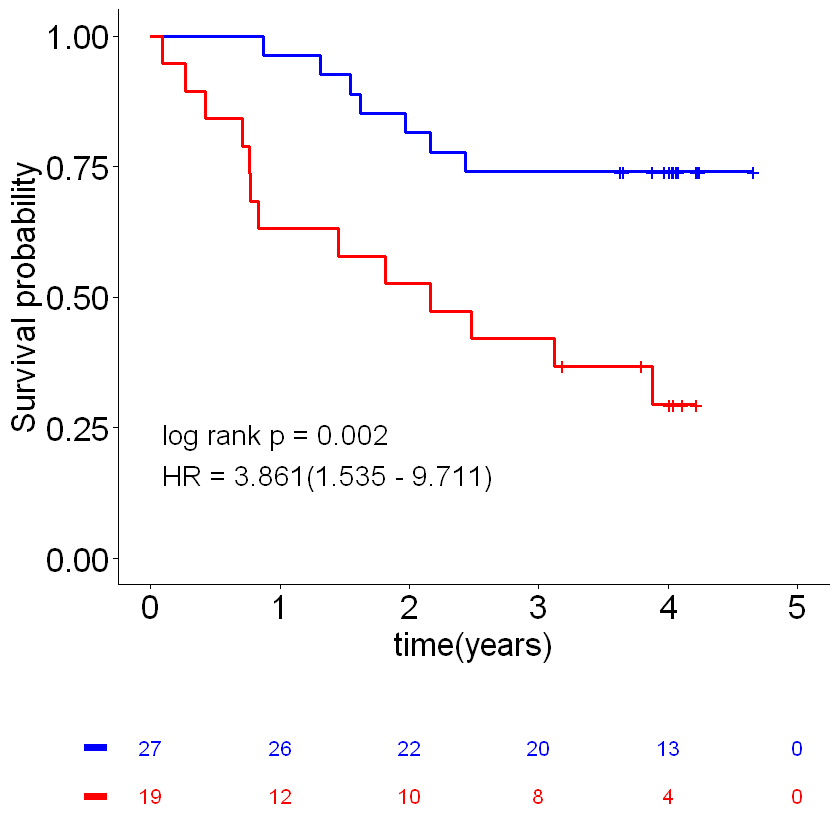

In [9]:
p2=ggsurvplot(survfit(Surv(dat$followe.up..years.,dat$is_dead)~immune_evasion_raw_neo,dat),
              pval="log rank p = 0.002\nHR = 3.861(1.535 - 9.711)",
              legend="none",
              xlab="time(years)",palette = c("blue","red"),pval.size = 6,
              font.x=c(20),font.y=c(20),font.xtickslab = c(20),font.ytickslab = c(20),font.legend=c(18), 
              risk.table = TRUE, risk.table.height=0.2,
              risk.table.title="",risk.table.col = "strata",risk.table.y.text=FALSE,
              tables.theme=theme(axis.title.x=element_blank(),
                               axis.text.x=element_blank(),
                               axis.title.y=element_blank(),
                               axis.line = element_blank(),
                               axis.ticks=element_blank(), legend.position = "none"))
p2

In [10]:
dat=subset(clinic,immune_evasion_clonal_neo!=-1)
dat$immune_evasion_clonal_neo=factor(dat$immune_evasion_clonal_neo)
summary(coxph(Surv(dat$followe.up..years.,dat$is_dead)~immune_evasion_clonal_neo,dat))

Call:
coxph(formula = Surv(dat$followe.up..years., dat$is_dead) ~ immune_evasion_clonal_neo, 
    data = dat)

  n= 50, number of events= 24 

                             coef exp(coef) se(coef)    z Pr(>|z|)   
immune_evasion_clonal_neo1 1.4583    4.2985   0.4515 3.23  0.00124 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                           exp(coef) exp(-coef) lower .95 upper .95
immune_evasion_clonal_neo1     4.299     0.2326     1.774     10.41

Concordance= 0.671  (se = 0.047 )
Likelihood ratio test= 11.79  on 1 df,   p=6e-04
Wald test            = 10.43  on 1 df,   p=0.001
Score (logrank) test = 12.34  on 1 df,   p=4e-04


Warning message:
"Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2."


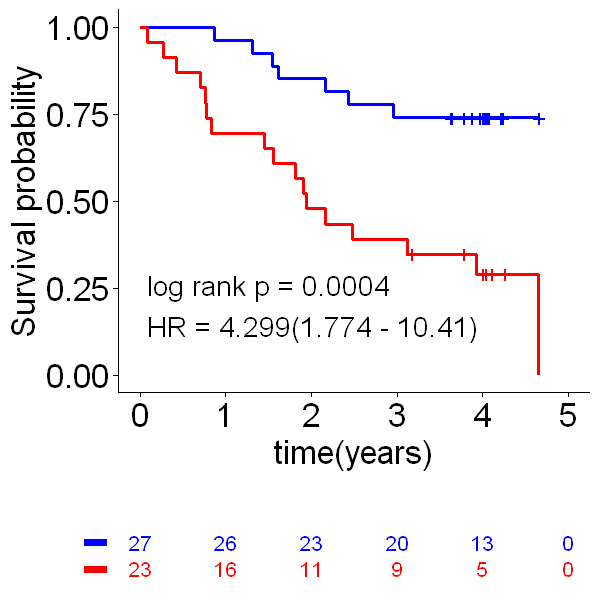

In [11]:
p3=ggsurvplot(survfit(Surv(dat$followe.up..years.,dat$is_dead)~immune_evasion_clonal_neo,dat),
              pval="log rank p = 0.0004\nHR = 4.299(1.774 - 10.41)", legend="none",
              xlab="time(years)",palette = c("blue","red"),pval.size = 6,
              font.x=c(20),font.y=c(20),font.xtickslab = c(20),font.ytickslab = c(20),font.legend=c(18), 
              risk.table = TRUE, risk.table.height=0.2,
              risk.table.title="",risk.table.col = "strata",risk.table.y.text=FALSE,
              tables.theme=theme(axis.title.x=element_blank(),
                               axis.text.x=element_blank(),
                               axis.title.y=element_blank(),
                               axis.line = element_blank(),
                               axis.ticks=element_blank(), legend.position = "none"))
options(repr.plot.height=5,repr.plot.width=5)
p3


In [12]:
dat=subset(clinic,immune_evasion_shannon!=-1)
dat$immune_evasion_shannon=factor(dat$immune_evasion_shannon)
summary(coxph(Surv(dat$followe.up..years.,dat$is_dead)~immune_evasion_shannon,dat))

Call:
coxph(formula = Surv(dat$followe.up..years., dat$is_dead) ~ immune_evasion_shannon, 
    data = dat)

  n= 72, number of events= 38 

                          coef exp(coef) se(coef)     z Pr(>|z|)   
immune_evasion_shannon1 0.9156    2.4982   0.3297 2.777  0.00549 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                        exp(coef) exp(-coef) lower .95 upper .95
immune_evasion_shannon1     2.498     0.4003     1.309     4.767

Concordance= 0.623  (se = 0.039 )
Likelihood ratio test= 7.82  on 1 df,   p=0.005
Wald test            = 7.71  on 1 df,   p=0.005
Score (logrank) test = 8.25  on 1 df,   p=0.004


Warning message:
"Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2."


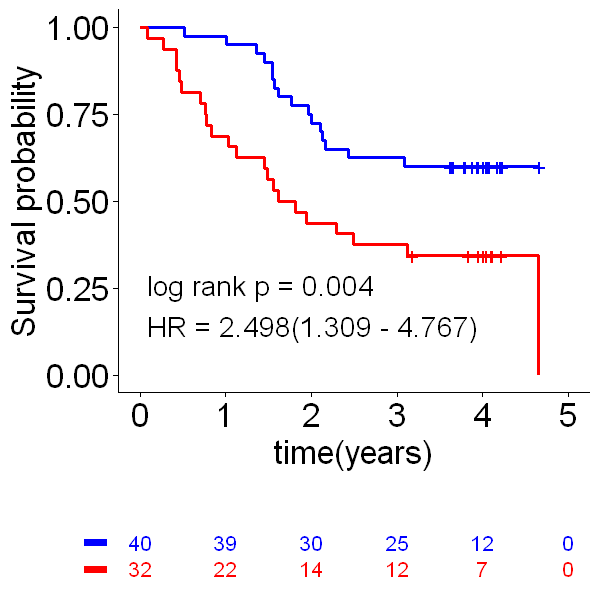

In [13]:

p4=ggsurvplot(survfit(Surv(dat$followe.up..years.,dat$is_dead)~immune_evasion_shannon,dat),
              pval="log rank p = 0.004\nHR = 2.498(1.309 - 4.767)",
              legend="none",
              xlab="time(years)",palette = c("blue","red"),pval.size = 6,
              font.x=c(20),font.y=c(20),font.xtickslab = c(20),font.ytickslab = c(20),font.legend=c(18), 
              risk.table = TRUE, risk.table.height=0.2,
              risk.table.title="",risk.table.col = "strata",risk.table.y.text=FALSE,
              tables.theme=theme(axis.title.x=element_blank(),
                               axis.text.x=element_blank(),
                               axis.title.y=element_blank(),
                               axis.line = element_blank(),
                               axis.ticks=element_blank(), legend.position = "none"))
p4
